# Importing the Dependencis

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#from sklearn.datasets import load_iris


# Data Collection and Processing

In [2]:
df = pd.read_csv('loan prediction.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
 # number of rows and columns
    
df.shape

(614, 13)

In [6]:
# Statistical measures

df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# number of missing values in each columns

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# dropping missing values

df = df.dropna()

In [9]:
# label encoding

df.replace({"Loan_Status" : {'N': 0, 'Y':1}}, inplace= True)

In [10]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [11]:
# Dependent column values

df['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [12]:
df['Property_Area'].value_counts()

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

In [13]:
df['Property_Area'].unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [14]:
df['Loan_Status'].value_counts()

1    332
0    148
Name: Loan_Status, dtype: int64

In [15]:
# replacing the value of 3+ to 4

df = df.replace(to_replace= '3+', value= 4)

In [16]:
df['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

# Data Visualization

<AxesSubplot:xlabel='Education', ylabel='count'>

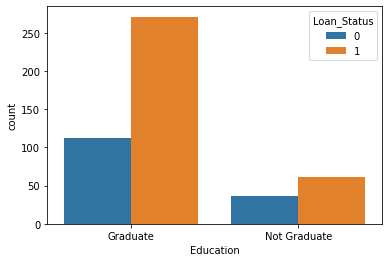

In [17]:
#education and loan status 

sns.countplot(x = 'Education', hue= 'Loan_Status', data= df)

<AxesSubplot:xlabel='Married', ylabel='count'>

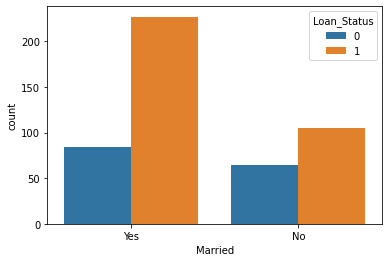

In [18]:
# marital Status and loan status

sns.countplot(x = 'Married', hue= 'Loan_Status', data= df)

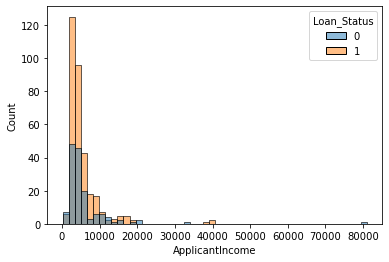

In [19]:
sns.histplot(data=df, x="ApplicantIncome",hue="Loan_Status",bins=50)
plt.show()

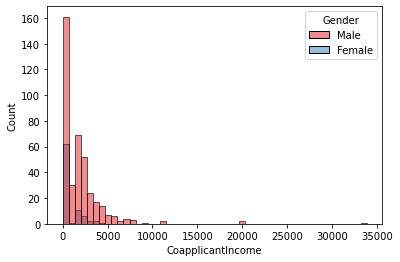

In [20]:
sns.histplot(data=df, x="CoapplicantIncome",hue="Gender",bins=50,palette="Set1")
plt.show()

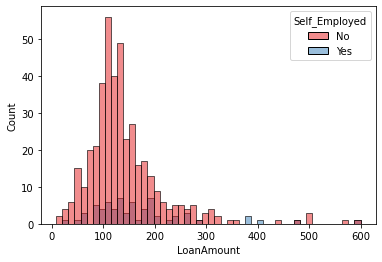

In [21]:
sns.histplot(data=df, x="LoanAmount",hue="Self_Employed",bins=50,palette="Set1")
plt.show()

In [22]:
label = ["No", "Yes"]

In [23]:
# convert categorical columns to numerical values

df.replace({'Married': {'No': 0, 'Yes': 1}, 'Gender': {'Male': 1, 'Female': 0}, 
            'Education': {'Graduate': 1, 'Not Graduate':0}, 'Self_Employed': {'No':0, 'Yes': 1}, 
            'Property_Area': {'Rural': 0, 'Semiurban': 1, 'Urban': 2}}, inplace= True)


In [24]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [25]:
# separating the data and label

X = df.drop(columns=['Loan_ID', 'Loan_Status'], axis= 1)
Y= df['Loan_Status']

In [26]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

# Train Test Data

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=42)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (384, 11) (96, 11)


# Training the model:

## Support Vector Machine Model

In [29]:
svm_classifier = svm.SVC(kernel='linear')

In [30]:
# training the support vector machine model

svm_classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

In [31]:
# accuracy score on training data

pred = svm_classifier.predict(X_test)
acc= accuracy_score(Y_test, pred)
print(f"Accuracy Score is: {acc}")

Accuracy Score is: 0.8125


In [32]:
# accuracy score on test data

X_test_prediction = svm_classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [33]:
print('Accuracy on test data: ', test_data_accuracy)

Accuracy on test data:  0.8125


In [34]:
print(classification_report(Y_test,pred,target_names=label)) #classification_report

              precision    recall  f1-score   support

          No       1.00      0.36      0.53        28
         Yes       0.79      1.00      0.88        68

    accuracy                           0.81        96
   macro avg       0.90      0.68      0.70        96
weighted avg       0.85      0.81      0.78        96



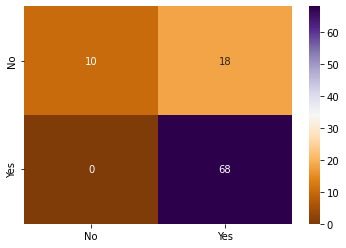

In [35]:
cf=confusion_matrix(Y_test,pred) #confusion_matrix
sns.heatmap(cf,annot=True,xticklabels=label,yticklabels=label,cmap="PuOr")
plt.show()